# General Figures

## Requirements

This notebook is meant to be run within the full **s4g_barfractions** repository, including the associated Python modules and data files.

In addition, this notebook requires, directly or indirectly, the following Python packages:
   * numpy
   * scipy
   * matplotlib

By default, output PDF figure files are *not* saved to disk; to enable this, set the `savePlots` variable in the **Setup** cell to `True` and change the `plotDir` variable (same cell) to point to where you want the figures saved.

## Setup

In [23]:
import numpy as np
import scipy

import datautils as du
import plotutils as pu
import s4gutils

# paths for locating data, saving plots, etc.
dataDir = "./data/"
simDir = dataDir
fbarLitDir = dataDir + "f_bar_trends-from-literature/"
# change the following if you want to save the figures somewhere convenient
baseDir = "/Users/erwin/Documents/Working/Paper-s4gbars/"
plotDir = baseDir + "plots/"
savePlots = False

s4gdata = du.ReadCompositeTable(dataDir+"s4gbars_table.dat", columnRow=25, dataFrame=True)
nDisksTotal = len(s4gdata.name)

# axis labels, etc., for plots
xtmstar = r"$\log \: (M_{\star} / M_{\odot})$"
xtfgas = r"$\log \: (M_{\rm HI} / M_{\star})$"
xtgmr = r"$g - r$"
xtmB = r"$B_{\rm tc}$"
xtBmV = r"$B - V$"
xtBmV_tc = r"$(B - V)_{\rm tc}$"
ytfbar = r"Bar Fraction $f_{\rm bar}$"
ytbarsize_kpc = r"Bar size $a_{\rm vis}$ [kpc]"
ytbarsize_kpc_obs = r"Observed bar size $a_{\rm vis}$ [kpc]"
ytR25_kpc = r"$R_{25}$ [kpc]"


ss1 = r"S$^{4}$G: $D \leq 25$ Mpc"
ss1m = r"S$^{4}$G: $D \leq 25$ Mpc, $\log M_{\star} \geq 8.5$"
ss1_bold = r"$\mathbf{S^{4}G:}$ $D \leq 25$ Mpc"
ss1m_bold = r"$\mathbf{S^{4}G:}$ $D \leq 25$ Mpc, $\log M_{\star} \geq 8.5$"
ss2 = r"S$^{4}$G: $D \leq 30$ Mpc"
ss2b = r"S$^{4}$G: $D \leq 30$ Mpc, $\log M_{\star} \geq 9$"
ss2 = r"S$^{4}$G: $D \leq 30$ Mpc"
ss2m = r"S$^{4}$G: $D \leq 30$ Mpc, $\log M_{\star} \geq 9$"
ss3 = r"S$^{4}$G: $D \leq 40$ Mpc"
ss3m = r"S$^{4}$G: $D \leq 40$ Mpc, $\log M_{\star} \geq 9.5$"

s4g_txt = r"S$^{4}$G"
s4g_txt_bold = r"$\mathbf{S^{4}G:}$"
s4g_fwhm_txt = r"S$^{4}$G $\langle$FWHM$\rangle$"

In [2]:
%pylab inline

matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Useful functions

In [3]:
def logistic_lin( x, a, b ):
    """Calculates the standard linear logistic function (probability distribution)
    for x (which can be a scalar or a numpy array).
    """
    
    return 1.0 / (1.0 + np.exp(-(a + b*x)))


def logistic_polyn( x, params ):
    """Calculates the general polynomial form of the logistic function 
    (probability distribution) for x (which can be a scalar or a numpy array).
    """
    
    order = len(params) - 1
    logit = params[0]
    for n in range(order):
        b = params[n + 1]
        logit += b * x**(n + 1)
    
    return 1.0 / (1.0 + np.exp(-logit))


def GetBarazzaData( fname ):
    """Retrieve bar fractions and total galaxy counts per bin for Barazza+2008 data
    (their Fig. 19); calculates proper binomial confidence intervals.
    """
    dlines = [line for line in open(fname) if line[0] != '#' and len(line) > 1]
    x = np.array([float(line.split()[0]) for line in dlines])
    f = np.array([float(line.split()[1]) for line in dlines])
    n = np.array([int(line.split()[2]) for line in dlines])
    n_bars = np.round(f*n)
    e_low_vect = []
    e_high_vect = []
    for i in range(len(x)):
        dummy,e_low,e_high = astrostat.Binomial(n_bars[i], n[i])
        e_low_vect.append(e_low)
        e_high_vect.append(e_high)
    return (x, f, np.array(e_low_vect), np.array(e_high_vect))


### Defining different subsamples via index vectors

Lists of integers defining indices of galaxies in Parent Disc Sample which meet various criteria
that define specific subsamples.

In [4]:
ii_barred = [i for i in range(nDisksTotal) if s4gdata.sma[i] > 0]
ii_unbarred = [i for i in range(nDisksTotal) if s4gdata.sma[i] <= 0]

ii_spirals = [i for i in range(nDisksTotal) if s4gdata.t_s4g[i] > -0.5]
ii_barred_spirals = [i for i in ii_spirals if i in ii_barred]
ii_unbarred_spirals = [i for i in ii_spirals if i in ii_unbarred]

# limited sample 1: D < 25 Mpc -- 663 spirals: 373 barred, 290 unbarred
ii_all_limited1 = [i for i in ii_spirals if s4gdata.dist[i] <= 25]
ii_barred_limited1 = [i for i in ii_all_limited1 if i in ii_barred]
ii_unbarred_limited1 = [i for i in ii_all_limited1 if i not in ii_barred]

ii_SB_limited1 = [i for i in ii_all_limited1 if i in ii_barred_limited1 and s4gdata.bar_strength[i] == 1]
ii_nonSB_limited1 = [i for i in ii_all_limited1 if i not in ii_SB_limited1]
ii_SAB_limited1 = [i for i in ii_all_limited1 if i in ii_barred_limited1 and s4gdata.bar_strength[i] == 2]
ii_nonSAB_limited1 = [i for i in ii_all_limited1 if i not in ii_SB_limited1]

# S0 only (74 S0s: 27 barred, 47 unbarred)
ii_all_limited1_S0 = [i for i in range(nDisksTotal) if s4gdata.dist[i] <= 25 and s4gdata.t_s4g[i] <= -0.5]
ii_barred_limited1_S0 = [i for i in ii_all_limited1_S0 if i in ii_barred]
ii_unbarred_limited1_S0 = [i for i in ii_all_limited1_S0 if i not in ii_barred]
ii_SB_limited1_S0 = [i for i in ii_SB_limited1 if s4gdata.t_s4g[i] <= -0.5]
ii_nonSB_limited1_S0 = [i for i in ii_nonSB_limited1 if s4gdata.t_s4g[i] <= -0.5]
ii_SAB_limited1_S0 = [i for i in ii_SAB_limited1 if s4gdata.t_s4g[i] <= -0.5]
ii_nonSAB_limited1_S0 = [i for i in ii_nonSAB_limited1 if s4gdata.t_s4g[i] <= -0.5]



# limited subsample 1m: D < 25 Mpc and log Mstar >= 8.5 -- 576 spirals: 356 barred, 220 unbarred
ii_all_limited1_m8_5 = [i for i in ii_all_limited1 if s4gdata.logmstar[i] >= 8.5]
ii_barred_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i in ii_barred]
ii_unbarred_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i not in ii_barred]
ii_SB_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i in ii_barred and s4gdata.bar_strength[i] == 1]
ii_nonSB_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i not in ii_SB_limited1_m8_5]
ii_SAB_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i in ii_barred and s4gdata.bar_strength[i] == 2]
ii_nonSAB_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i not in ii_SB_limited1_m8_5]
# S0 only (74 S0s: 27 barred, 47 unbarred)
ii_all_limited1_m8_5_S0 = [i for i in ii_all_limited1_S0 if s4gdata.logmstar[i] >= 8.5]
ii_barred_limited1_m8_5_S0 = [i for i in ii_all_limited1_m8_5_S0 if i in ii_barred]
ii_unbarred_limited1_m8_5_S0 = [i for i in ii_all_limited1_m8_5_S0 if i not in ii_barred]
ii_SB_limited1_m8_5_S0 = [i for i in ii_all_limited1_m8_5_S0 if i in ii_barred and s4gdata.bar_strength[i] == 1]
ii_nonSB_limited1_m8_5_S0 = [i for i in ii_all_limited1_m8_5_S0 if i not in ii_SB_limited1_m8_5_S0]
ii_SAB_limited1_m8_5_S0 = [i for i in ii_all_limited1_m8_5_S0 if i in ii_barred and s4gdata.bar_strength[i] == 2]
ii_nonSAB_limited1_m8_5_s0 = [i for i in ii_all_limited1_m8_5_S0 if i not in ii_SAB_limited1_m8_5_S0 and s4gdata.t_s4g[i]]



# limited subsample 2: D < 30 Mpc -- 856 galaxies: 483 barred, 373 unbarred
ii_all_limited2 = [i for i in ii_spirals if s4gdata.dist[i] <= 30]
ii_barred_limited2 = [i for i in ii_all_limited2 if i in ii_barred]
ii_unbarred_limited2 = [i for i in ii_all_limited2 if i not in ii_barred]

ii_SB_limited2 = [i for i in ii_barred_limited2 if s4gdata.bar_strength[i] == 1]
ii_nonSB_limited2 = [i for i in ii_all_limited2 if i not in ii_SB_limited2]
ii_SAB_limited2 = [i for i in ii_barred_limited2 if s4gdata.bar_strength[i] == 2]
ii_nonSAB_limited2 = [i for i in ii_all_limited2 if i not in ii_SB_limited2]

# S0 only (74 S0s: 27 barred, 47 unbarred)
ii_all_limited2_S0 = [i for i in range(nDisksTotal) if s4gdata.dist[i] <= 30 and s4gdata.t_s4g[i] <= -0.5]
ii_barred_limited2_S0 = [i for i in ii_all_limited2_S0 if i in ii_barred]
ii_unbarred_limited2_S0 = [i for i in ii_all_limited2_S0 if i not in ii_barred]
ii_SB_limited2_S0 = [i for i in ii_SB_limited2 if s4gdata.t_s4g[i] <= -0.5]
ii_nonSB_limited2_S0 = [i for i in ii_nonSB_limited2 if s4gdata.t_s4g[i] <= -0.5]
ii_SAB_limited2_S0 = [i for i in ii_SAB_limited2 if s4gdata.t_s4g[i] <= -0.5]
ii_nonSAB_limited2_S0 = [i for i in ii_nonSAB_limited2 if s4gdata.t_s4g[i] <= -0.5]


# limited subsample 2m: D < 30 Mpc and log Mstar >= 9 -- 639 galaxies: 398 barred, 241 unbarred
ii_all_limited2_m9 = [i for i in ii_all_limited2 if s4gdata.logmstar[i] >= 9]
ii_barred_limited2_m9 = [i for i in ii_all_limited2_m9 if i in ii_barred]
ii_unbarred_limited2_m9 = [i for i in ii_all_limited2_m9 if i not in ii_barred]

ii_SB_limited2_m9 = [i for i in ii_all_limited2_m9 if i in ii_barred and s4gdata.bar_strength[i] == 1]
ii_nonSB_limited2_m9 = [i for i in ii_all_limited2_m9 if i not in ii_SB_limited2_m9]
ii_SAB_limited2_m9 = [i for i in ii_all_limited2_m9 if i in ii_barred and s4gdata.bar_strength[i] == 2]
ii_nonSAB_limited2_m9 = [i for i in ii_all_limited2_m9 if i not in ii_SAB_limited2_m9]


# galaxies with/without HyperLeda B-V colors
ii_dist25 = [i for i in range(nDisksTotal) if s4gdata.dist[i] <= 25.0]
ii_dist30 = [i for i in range(nDisksTotal) if s4gdata.dist[i] <= 30.0]

ii_bmv_good = [i for i in range(nDisksTotal) if s4gdata.BmV_tc[i] > -2]
ii_bmv_missing = [i for i in range(nDisksTotal) if s4gdata.BmV_tc[i] < -2]
ii_d30_bmv_good = [i for i in ii_bmv_good if i in ii_dist30]
ii_d30_bmv_missing = [i for i in ii_bmv_missing if i in ii_dist30]
ii_d25_bmv_good = [i for i in ii_bmv_good if i in ii_dist25]
ii_d25_bmv_missing = [i for i in ii_bmv_missing if i in ii_dist25]


## Generate files for logistic regression with R

This code will regenerate the input files for the logistic regression analysis in R (see R notebook `s4gbars_R_logistic-regression.ipynb`)

By default, this will save the file in the data/ subdirectory, overwriting the pre-existing files. To change the destination, redefine `dataDir`.

In [5]:
# optionally redefine dataDir to save files in a different location
# dataDir = XXX

outf = open(dataDir+"barpresence_vs_logmstar_for_R.txt", 'w')
outf.write("# Bar presence as function of log(M_star/M_sun) for D < 25 Mpc\n")
outf.write("logmstar   bar\n")
for i in ii_all_limited1:
    logmstar = s4gdata.logmstar[i]
    if i in ii_barred_limited1:
        barFlag = 1
    else:
        barFlag = 0
    outf.write("%.3f    %d\n" % (logmstar, barFlag))
outf.close()

# restrict things to logMstar = 8.5--11 to avoid low-mass galaxies with crazy-high Vmax weights
# and tiny number of galaxies with logMstar > 11
ff = "barpresence_vs_logmstar_for_R_w25_m8.5-11.txt"
outf = open(dataDir+ff, 'w')
outf.write("# Bar presence as function of log(M_star/M_sun) for D < 25 Mpc, with V_max weights\n")
outf.write("logmstar   weight   bar\n")
n_tot = 0
for i in ii_all_limited1:
    if s4gdata.logmstar[i] >= 8.5 and s4gdata.logmstar[i] <= 11:
        logmstar = s4gdata.logmstar[i]
        weight = s4gdata.w25[i]
        if i in ii_barred_limited1:
            barFlag = 1
        else:
            barFlag = 0
        outf.write("%.3f   %.3f    %d\n" % (logmstar, weight, barFlag))
        n_tot += 1
outf.close()
print("%s: %d galaxies" % (ff, n_tot))

# SB and SAB separately
# restrict things to logMstar = 8.5--11 to avoid low-mass galaxies with crazy-high Vmax weights
# and tiny number of galaxies with logMstar > 11
ff = "SBpresence_vs_logmstar_for_R_w25_m8.5-11.txt"
outf = open(dataDir+ff, 'w')
outf.write("# Bar presence as function of log(M_star/M_sun) for D < 25 Mpc, with V_max weights\n")
outf.write("logmstar   weight   SB\n")
n_tot = 0
for i in ii_all_limited1:
    if s4gdata.logmstar[i] >= 8.5 and s4gdata.logmstar[i] <= 11:
        logmstar = s4gdata.logmstar[i]
        weight = s4gdata.w25[i]
        if i in ii_SB_limited1:
            barFlag = 1
        else:
            barFlag = 0
        outf.write("%.3f   %.3f    %d\n" % (logmstar, weight, barFlag))
        n_tot += 1
outf.close()
print("%s: %d galaxies" % (ff, n_tot))

ff = "SABpresence_vs_logmstar_for_R_w25_m8.5-11.txt"
outf = open(dataDir+ff, 'w')
outf.write("# Bar presence as function of log(M_star/M_sun) for D < 25 Mpc, with V_max weights\n")
outf.write("logmstar   weight   SAB\n")
n_tot = 0
for i in ii_all_limited1:
    if s4gdata.logmstar[i] >= 8.5 and s4gdata.logmstar[i] <= 11:
        logmstar = s4gdata.logmstar[i]
        weight = s4gdata.w25[i]
        if i in ii_SAB_limited1:
            barFlag = 1
        else:
            barFlag = 0
        outf.write("%.3f   %.3f    %d\n" % (logmstar, weight, barFlag))
        n_tot += 1
outf.close()
print("%s: %d galaxies" % (ff, n_tot))



# restrict things to logMstar = 8.5--11 to avoid low-mass galaxies with crazy-high Vmax weights
# and tiny number of galaxies with logMstar > 11
ff = "barpresence_vs_logmstar-Re_for_R_w25.txt"
outf = open(dataDir+ff, 'w')
outf.write("# Bar presence as function of log(M_star/M_sun) and log(R_e) for D < 25 Mpc, with V_max weights\n")
outf.write("logmstar   logRe  weight   bar\n")
n_tot = 0
for i in ii_all_limited1:
    if s4gdata.logmstar[i] >= 8.5 and s4gdata.logmstar[i] <= 11 and s4gdata.Re_kpc[i] > 0:
        logmstar = s4gdata.logmstar[i]
        logRe = math.log10(s4gdata.Re_kpc[i])
        weight = s4gdata.w25[i]
        if i in ii_barred_limited1:
            barFlag = 1
        else:
            barFlag = 0
        outf.write("%.3f   %.3f   %.3f    %d\n" % (logmstar, logRe, weight, barFlag))
        n_tot += 1
outf.close()
print("%s: %d galaxies" % (ff, n_tot))


ff = "barpresence_vs_logmstar-logfgas_for_R_w25.txt"
outf = open(dataDir+ff, 'w')
outf.write("# Bar presence as function of log(M_star/M_sun) and log(f_gas) for D < 25 Mpc, with V_max weights\n")
outf.write("logmstar   logfgas  weight   bar\n")
n_tot = 0
for i in ii_all_limited1:
    if s4gdata.logmstar[i] >= 8.5 and s4gdata.logmstar[i] <= 11 and s4gdata.logfgas[i] < 3:
        logmstar = s4gdata.logmstar[i]
        logfgas = s4gdata.logfgas[i]
        weight = s4gdata.w25[i]
        if i in ii_barred_limited1:
            barFlag = 1
        else:
            barFlag = 0
        outf.write("%.3f   %.3f   %.3f    %d\n" % (logmstar, logfgas, weight, barFlag))
        n_tot += 1
outf.close()
print("%s: %d galaxies" % (ff, n_tot))


ww25 = s4gdata.weight_BmVtc * s4gdata.w25
ff = "barpresence_vs_logmstar-gmr_for_R_w25.txt"
outf = open(dataDir+ff, 'w')
outf.write("# Bar presence as function of g-r for D < 25 Mpc and logMstar > 8.5, with B-V and V_max weights\n")
outf.write("logmstar   gmr   weight   bar\n")
n_tot = 0
for i in ii_all_limited1_m8_5:
    if s4gdata.gmr_tc[i] >= -1:
        logmstar = s4gdata.logmstar[i]
        gmr = s4gdata.gmr_tc[i]
        weight = ww25[i]
        if i in ii_barred_limited1:
            barFlag = 1
        else:
            barFlag = 0
        outf.write("%.3f   %.3f   %.3f    %d\n" % (logmstar, gmr, weight, barFlag))
        n_tot += 1
outf.close()
print("%s: %d galaxies" % (ff, n_tot))


barpresence_vs_logmstar_for_R_w25_m8.5-11.txt: 563 galaxies
SBpresence_vs_logmstar_for_R_w25_m8.5-11.txt: 563 galaxies
SABpresence_vs_logmstar_for_R_w25_m8.5-11.txt: 563 galaxies
barpresence_vs_logmstar-Re_for_R_w25.txt: 548 galaxies
barpresence_vs_logmstar-logfgas_for_R_w25.txt: 563 galaxies
barpresence_vs_logmstar-gmr_for_R_w25.txt: 319 galaxies


## Figures

### Figure 1 (left panel): Distances of galaxies in S4G Parent Disk Sample vs stellar mass

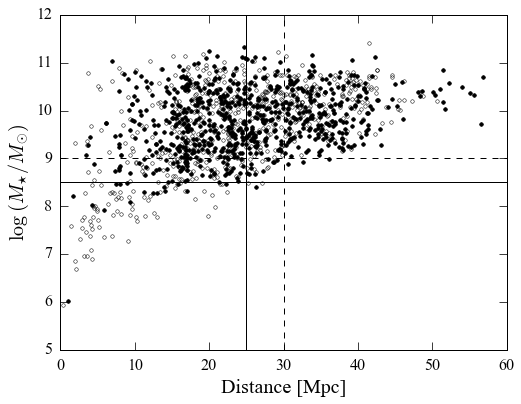

In [6]:
plt.plot(s4gdata.dist, s4gdata.logmstar, 'ko', mfc='None', mec='k',ms=3.5)
plt.plot(s4gdata.dist[ii_barred], s4gdata.logmstar[ii_barred], 'ko',ms=3.5)
plt.axvline(25)
plt.axvline(30, ls='--')
plt.axhline(8.5)
plt.axhline(9, ls='--')
xlim(0,60)
plt.xlabel("Distance [Mpc]"); plt.ylabel(xtmstar)
if savePlots: plt.savefig(plotDir+"logMstar-vs-distance.pdf")

### Figure 1 (right panel): $R_{25}$ vs distance for S4G spirals

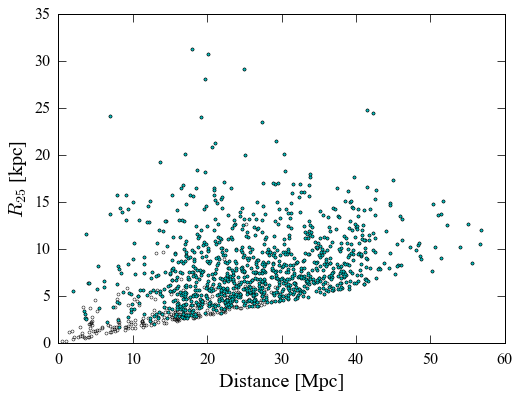

In [7]:
# define extra subsample for plot: all spirals with log(M_star) >= 9
ii_logmstar9 = [i for i in ii_spirals if s4gdata.logmstar[i] >= 9]

plot(s4gdata.dist[ii_spirals], s4gdata.R25_kpc[ii_spirals], 'ko', mfc='None', mec='k',ms=3)
plot(s4gdata.dist[ii_logmstar9], s4gdata.R25_kpc[ii_logmstar9], 'co', ms=3)
xlim(0,60)
xlabel("Distance [Mpc]"); ylabel(ytR25_kpc)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"R25-vs-distance.pdf")

### Figure 2 (left panel): $g - r$ vs stellar mass

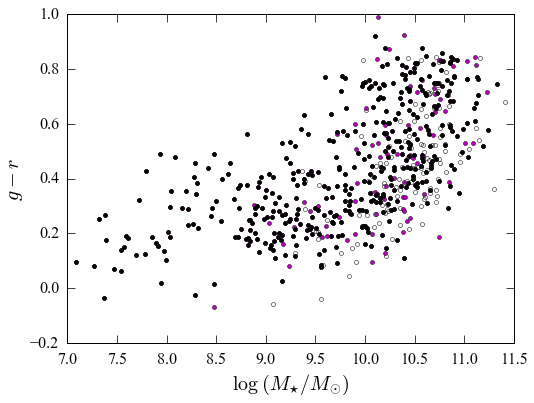

In [8]:
# define extra subsamples for plot: galaxies with valid B-V_tc values; subsets at different distances
ii_bmv_good = [i for i in range(nDisksTotal) if s4gdata.BmV_tc[i] > -2]
iii30 = [i for i in ii_bmv_good if s4gdata.dist[i] <= 30]
iii25 = [i for i in ii_bmv_good if s4gdata.dist[i] <= 25]
iii_larger = [i for i in ii_bmv_good if s4gdata.dist[i] > 30]

plot(s4gdata.logmstar[iii_larger], s4gdata.gmr_tc[iii_larger], 'o', mfc='None', ms=4)
plot(s4gdata.logmstar[iii30], s4gdata.gmr_tc[iii30], 'mo', ms=4)
plot(s4gdata.logmstar[iii25], s4gdata.gmr_tc[iii25], 'ko', ms=4)
xlabel(xtmstar); ylabel(xtgmr)
xlim(7,11.5)
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"gmr-vs-logmstar.pdf")

### Figure 2 (right panel): Gas mass ratio $f_{\rm gas}$ vs stellar mass

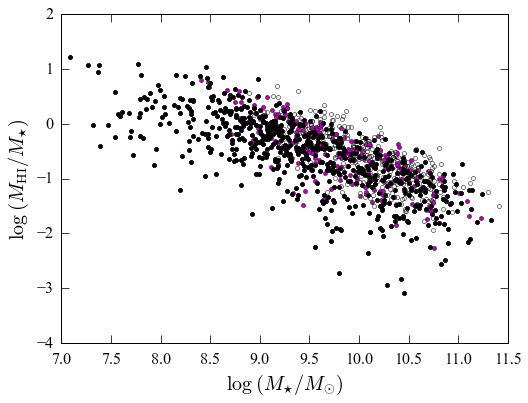

In [9]:
# define extra subsamples for plot: galaxies with valid H_I meassurements; subsets at different distances
iii25 = [i for i in ii_spirals if s4gdata.M_HI[i] < 1.0e40 and s4gdata.dist[i] <= 25]
iii30 = [i for i in ii_spirals if s4gdata.M_HI[i] < 1.0e40 and s4gdata.dist[i] <= 30]
iii_larger = [i for i in ii_spirals if s4gdata.M_HI[i] < 1.0e40 and s4gdata.dist[i] > 30]

plot(s4gdata.logmstar[iii_larger], s4gdata.logfgas[iii_larger], 'o', mfc='None', ms=4)
plot(s4gdata.logmstar[iii30], s4gdata.logfgas[iii30], 'mo', ms=4)
plot(s4gdata.logmstar[iii25], s4gdata.logfgas[iii25], 'ko', ms=4)
xlabel(xtmstar); ylabel(xtfgas)
xlim(7,11.5)
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"logfgas-vs-logmstar.pdf")

### Figure 4: Histogram of stellar masses in different subsamples

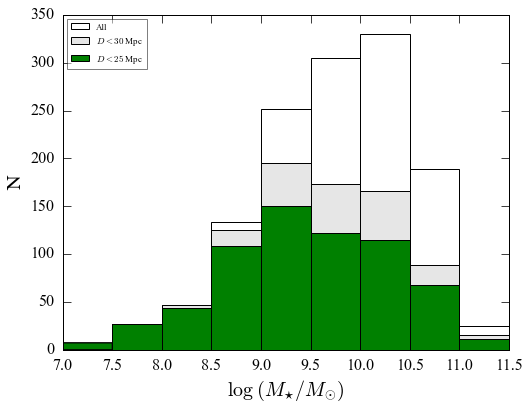

In [10]:
hist(s4gdata.logmstar, bins=np.arange(7,12,0.5), color='1.0', label="All")
hist(s4gdata.logmstar[ii_all_limited2], bins=np.arange(7,12,0.5), color='0.9', label=r"$D < 30$ Mpc")
hist(s4gdata.logmstar[ii_all_limited1], bins=np.arange(7,12,0.5), color='g', label=r"$D < 25$ Mpc")
xlabel(xtmstar);ylabel("N")
legend(fontsize=9, loc='upper left', framealpha=0.5)
if savePlots: savefig(plotDir+"logmstar_hist.pdf")

### Figure 5: Bar fraction as function of stellar mass, color, gas mass fraction

The code here is for the six individual panels of the figure

#### Figure 5 (upper left panel): Bar frequency vs stellar mass

[u'N&A 2010', u'Masters+2012', u'Melvin+2014', u'Gavazzi+2015', u'$\\mathbf{S^{4}G:}$ logistic fit', u'$\\mathbf{S^{4}G:}$ $D \\leq 25$ Mpc', u'Barazza+2008']
[u'$\\mathbf{S^{4}G:}$ $D \\leq 25$ Mpc', u'$\\mathbf{S^{4}G:}$ logistic fit', u'Barazza+2008', u'Masters+2012', u'Melvin+2014', u'Gavazzi+2015', u'N&A 2010']


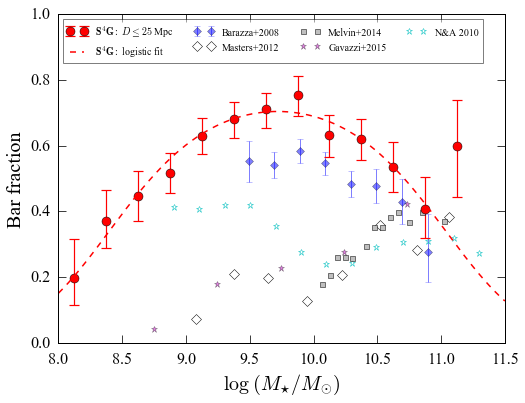

In [11]:
# load Barazza+2008 bar frequencies
logmstar_b08,fbar_b08,fbar_e_low_b08,fbar_e_high_b08 = GetBarazzaData(fbarLitDir+"fbar-vs-logmstar_barazza+2008.txt")

# load other SDSS-based bar frequencies
logmstar_na10,fbar_na10 = profiles.ReadProfile(fbarLitDir+"fbar-vs-logMstar_nair-abraham2010.txt")
logmstar_m12,fbar_m12 = profiles.ReadProfile(fbarLitDir+"fbar-vs-logmstar_masters+2012.txt")
logmstar_m14,fbar_m14 = profiles.ReadProfile(fbarLitDir+"fbar-vs-logmstar_melvin+2014.txt")
logmstar_g15,fbar_g15 = profiles.ReadProfile(fbarLitDir+"fbar-vs-logmstar_gavazzi+2015.txt")

# quadratic logistic fit (using weights) -- see R notebook s4gbars_R_logistic-regression.ipynb
# for determination of parameters
logistic_params = [-82.2446, 17.1052, -0.8801]
mm = np.arange(8.0,11.51,0.01)
logistic_fit2w = logistic_polyn(mm, logistic_params)

# plot SDSS-based bar frequencies
plt.plot(logmstar_na10, fbar_na10, '*', mfc="None",mec='c', ms=7,label='N&A 2010')
plt.plot(logmstar_m12, fbar_m12, 'D', mfc="None",mec='k', ms=7,label='Masters+2012')
plt.plot(logmstar_m14, fbar_m14, 's', mfc="0.75",mec='k', ms=5,label='Melvin+2014')
plt.plot(logmstar_g15, fbar_g15, '*', color='m', alpha=0.5, ms=7,label='Gavazzi+2015')

# plot S4G bar frequencies and quadratic logistic fit
pu.PlotFrequencyWithWeights(s4gdata.logmstar, s4gdata.w25, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.3,0.25, fmt='ro', ms=9, noErase=True, label=ss1_bold)
plt.plot(mm, logistic_fit2w, 'r--', lw=1.5, label=s4g_txt_bold + " logistic fit")
plt.errorbar(logmstar_b08, fbar_b08, yerr=[fbar_e_low_b08,fbar_e_high_b08], fmt='bD',alpha=0.5, label='Barazza+2008')
plt.ylim(0,1)
plt.xlabel(xtmstar); plt.ylabel('Bar fraction')

# re-order labels in legend
ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
print(labels)
handles = [handles[5], handles[4], handles[6], handles[1], handles[2], handles[3], handles[0]]
labels = [labels[5], labels[4], labels[6], labels[1], labels[2], labels[3], labels[0]]
legend(handles, labels, loc="upper left", fontsize=10, ncol=4, framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fbar-vs-logmstar.pdf")
print(labels)

#### Figure 5 (upper right panel): SB and SAB frequencies vs stellar mass

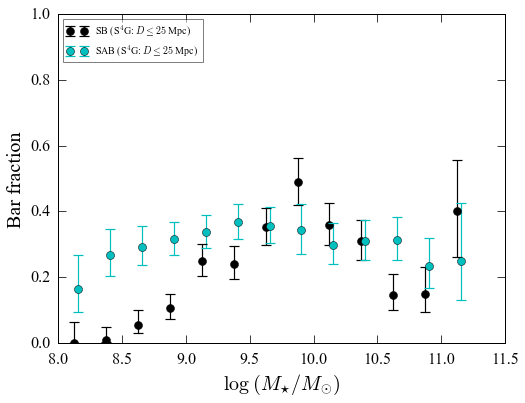

In [12]:
pu.PlotFrequencyWithWeights(s4gdata.logmstar, s4gdata.w25, ii_SB_limited1, ii_nonSB_limited1, 8.0, 11.3, 0.25, fmt='ko',ms=8, label=r'SB (S$^{4}$G: $D \leq 25$ Mpc)')
pu.PlotFrequencyWithWeights(s4gdata.logmstar, s4gdata.w25, ii_SAB_limited1, ii_nonSAB_limited1, 8.0, 11.3, 0.25, offset=0.03, fmt='co', ms=8, noErase=True, label=r'SAB (S$^{4}$G: $D \leq 25$ Mpc)')
plt.ylim(0,1)
plt.xlabel(xtmstar); plt.ylabel('Bar fraction')
legend(fontsize=10, loc='upper left', framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fSB-fSAB-vs-logmstar.pdf")

#### Figure 5 (middle left panel): Bar frequency vs color

plotutils.py:75: RuntimeWarning: invalid value encountered in divide
  scaleFactors = n_all / n_all_unwt
s4gutils.py:107: RuntimeWarning: divide by zero encountered in divide
  sigma_mod = np.sqrt(z_alpha2 * n_tot * (p*q + z_alpha2/(4.0*n_tot))) / n_tot_mod


[u'N&A 2010', u'Masters+2011', u'Masters+2012', u'Lee+2012', u'$\\mathbf{S^{4}G:}$ logistic fit', u'$\\mathbf{S^{4}G:}$ $D \\leq 25$ Mpc, $\\log M_{\\star} \\geq 8.5$', u'Barazza+2008']


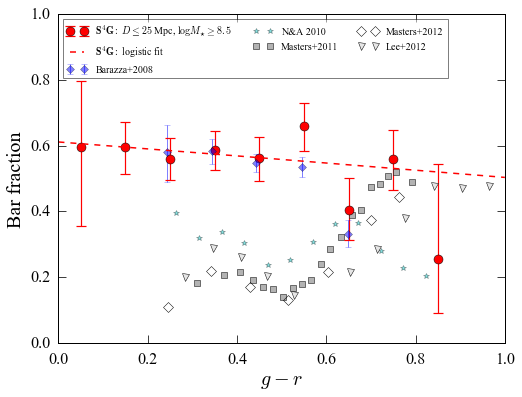

In [13]:
gmr_b08,fbar_b08,fbar_e_low_b08,fbar_e_high_b08 = GetBarazzaData(fbarLitDir+"fbar-vs-gmr_barazza+2008.txt")
gmr_na10,fbar_na10 = profiles.ReadProfile(fbarLitDir+"fbar-vs-gmr_nair-abraham2010.txt")
gmr_m11,fbar_m11 = profiles.ReadProfile(fbarLitDir+"fbar-vs-gmr_masters+2011.txt")
gmr_m12,fbar_m12 = profiles.ReadProfile(fbarLitDir+"fbar-vs-gmr_masters+2012.txt")
gmr_lee12,fbar_lee12 = profiles.ReadProfile(fbarLitDir+"fbar-vs-gmr_lee+2012.txt")

# calculate weights: product of color and V/V_max weights
ww25 = s4gdata.weight_BmVtc * s4gdata.w25
ww30 = s4gdata.weight_BmVtc * s4gdata.w30

plt.plot(gmr_na10, fbar_na10, '*', color='c',alpha=0.5, label='N&A 2010')
plt.plot(gmr_m11, fbar_m11, 's', color='0.7', label='Masters+2011')
plt.plot(gmr_m12, fbar_m12, 'D', mfc="None",mec='k', ms=7, label='Masters+2012')
plt.plot(gmr_lee12, fbar_lee12, 'v', mfc="0.9", mec='k', ms=7, label='Lee+2012')
pu.PlotFrequencyWithWeights(s4gdata.gmr_tc, ww25, ii_barred_limited1_m8_5, ii_unbarred_limited1_m8_5, -0.2,1.0,0.1, noErase=True, fmt='ro', ms=9, label=ss1m_bold)
plt.errorbar(gmr_b08, fbar_b08, yerr=[fbar_e_low_b08,fbar_e_high_b08], fmt='bD',alpha=0.5, label='Barazza+2008')
# linear logistic regression for S4G galaxies
gmrvect = np.arange(0,1.1, 0.1)
plot(gmrvect, logistic_lin(gmrvect, 0.4544, -0.4394), 'r--', lw=1.5, label=s4g_txt_bold + " logistic fit")
plt.xlabel(xtgmr); plt.ylabel('Bar fraction')
xlim(0,1);ylim(0,1)

# re-order labels in legend
ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
print(labels)
handles = [handles[5], handles[4], handles[6], handles[0], handles[1], handles[2], handles[3]]
labels = [labels[5], labels[4], labels[6], labels[0], labels[1], labels[2], labels[3]]
legend(handles, labels, loc="upper left", fontsize=10, ncol=3, framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fbar-vs-gmr_corrected_all.pdf")

#### Figure 5 (middle right panel): SB and SAB frequencies vs color

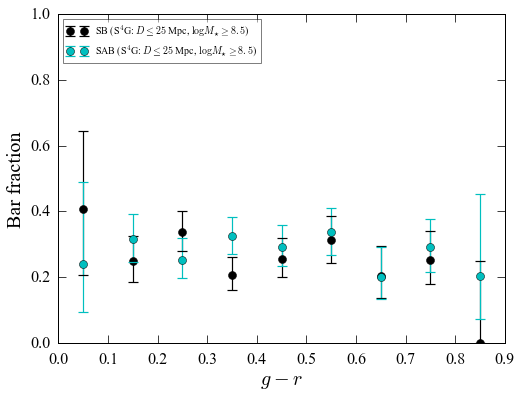

In [15]:
pu.PlotFrequencyWithWeights(s4gdata.gmr_tc, ww25, ii_SB_limited1_m8_5, ii_nonSB_limited1_m8_5, -0.2,1,0.1, fmt='ko', ms=8, label="SB ("+ss1m+")")
pu.PlotFrequencyWithWeights(s4gdata.gmr_tc, ww25, ii_SAB_limited1_m8_5, ii_nonSAB_limited1_m8_5, -0.2,1,0.1, fmt='co', ms=8, noErase=True, label="SAB ("+ss1m+")")
plt.ylim(0,1)
plt.xlabel(xtgmr); plt.ylabel('Bar fraction')
legend(loc="upper left", fontsize=10, framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fSB-fSAB-vs-gmr_corrected.pdf")

#### Figure 5 (lower left panel): Bar frequency vs gas mass ratio

[u'Masters+2012', u'Cervantes Sodi 2017', u'$\\mathbf{S^{4}G:}$ logistic fit', u'$\\mathbf{S^{4}G:}$ $D \\leq 25$ Mpc, $\\log M_{\\star} \\geq 8.5$']


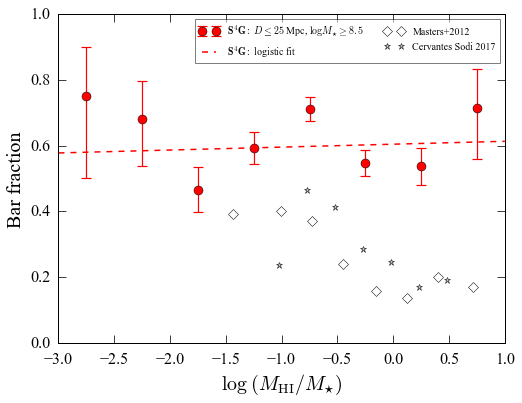

In [16]:
logfgas_m12,fbar_m12 = profiles.ReadProfile(fbarLitDir+"fbar-vs-logfgas_masters+2012.txt")
logfgas_cs17_raw,fbar_cs17 = profiles.ReadProfile(fbarLitDir+"fbar-vs-logfgas_cervantes_sodi2017.txt")
# correct CS17 values from log M_{HI + He}/M_{star} to log M_{HI}/M_{star}
logfgas_cs17 = logfgas_cs17_raw - 0.146

plt.clf();pu.PlotFrequencyWithWeights(s4gdata.logfgas, s4gdata.w25, ii_barred_limited1_m8_5, ii_unbarred_limited1_m8_5, -3,2,0.5, fmt='ro', ms=9, label=ss1m_bold)
plt.plot(logfgas_m12, fbar_m12, 'D', mfc="None",mec='k', ms=7,label='Masters+2012')
plt.plot(logfgas_cs17, fbar_cs17, '*', color='0.75', ms=7,label='Cervantes Sodi 2017')
# linear logistic regression for S4G galaxies
fgasvect = np.arange(-3, 1.01, 0.01)
plot(fgasvect, logistic_lin(fgasvect, 0.42456, 0.03684), 'r--', lw=1.5, label=s4g_txt_bold + " logistic fit")
plt.xlabel(xtfgas);plt.ylabel('Bar fraction')
plt.ylim(0,1);plt.xlim(-3,1)

# re-order labels in legend
ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
print(labels)
handles = [handles[3], handles[2], handles[0], handles[1]]
labels = [labels[3], labels[2], labels[0], labels[1]]
legend(handles, labels, loc="upper right", fontsize=10, ncol=2, framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: savefig(plotDir+"fbar-vs-fgas.pdf")

#### Figure 5 (lower right panel): SB and SAB frequencies vs gas mass ratio

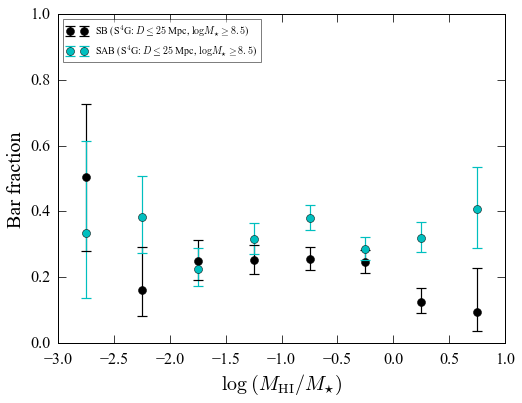

In [18]:
pu.PlotFrequencyWithWeights(s4gdata.logfgas, s4gdata.w25, ii_SB_limited1_m8_5, ii_nonSB_limited1_m8_5, -3,1.5,0.5, fmt='ko', ms=8, label="SB ("+ss1m+")")
pu.PlotFrequencyWithWeights(s4gdata.logfgas, s4gdata.w25, ii_SAB_limited1_m8_5, ii_nonSAB_limited1_m8_5, -3,1.5,0.5, fmt='co', ms=8, noErase=True, label="SAB ("+ss1m+")")
plt.legend(loc='upper left',fontsize=10, framealpha=0.5)
plt.ylim(0,1);xlim(-3,1)
plt.xlabel(xtfgas); plt.ylabel('Bar fraction')
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fSB-fSAB-vs-fgas.pdf")

### Figure A1

We generate an interpolating spline using an edited version of the actual binned f(B_tc) values -- basically, we ensure that the spline interpolation goes smoothly to 0 for faint magnitudes and smoothly to 1 for bright magnitudes.

In [19]:
# generate Akima spline interpolation for f(B-V) as function of B_tc
x_Btc = [7.0, 8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75, 14.25, 14.75, 15.25, 15.75, 16.25]
y_fBmV = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9722222222222222, 0.8840579710144928, 0.8125, 0.6222222222222222, 0.5632183908045977, 0.4074074074074074, 0.2727272727272727, 0.3442622950819672, 0.2978723404255319, 0.10714285714285714, 0.01, 0.0]
fBmV_akimaspline = scipy.interpolate.Akima1DInterpolator(x_Btc, y_fBmV)

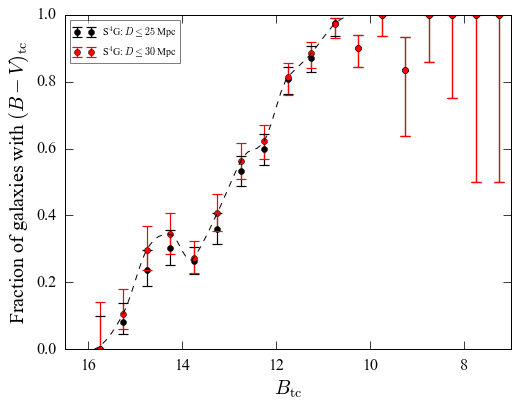

In [20]:
reload(pu)
xx = np.arange(7,17,0.1)
pu.PlotFrequency(s4gdata.B_tc, ii_d30_bmv_good, ii_d30_bmv_missing, 7,16.5,0.5, fmt='ko', label=ss1)
pu.PlotFrequency(s4gdata.B_tc, ii_d25_bmv_good, ii_d25_bmv_missing, 7,16.5,0.5, fmt='ro', label=ss2, noErase=True)
plot(xx, fBmV_akimaspline(xx), color='k', ls='--')
xlim(16.5,7); ylim(0,1)
xlabel(xtmB); ylabel(r"Fraction of galaxies with $(B - V)_{\rm tc}$")
legend(fontsize=10,loc='upper left', framealpha=0.5)
if savePlots: savefig(plotDir+"f_bmv-vs-btc-with-spline.pdf")

### Figure A2

#### Left panel

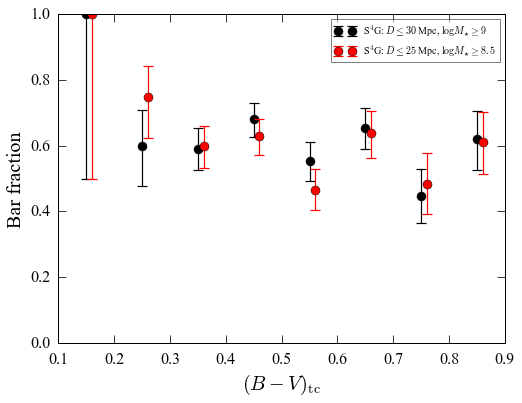

In [24]:
pu.PlotFrequencyWithWeights(s4gdata.BmV_tc, s4gdata.weight_BmVtc, ii_barred_limited2_m9, ii_unbarred_limited2_m9, 0,1,0.1, fmt='ko', ms=9, label=ss2m);
pu.PlotFrequencyWithWeights(s4gdata.BmV_tc, s4gdata.weight_BmVtc, ii_barred_limited1_m8_5, ii_unbarred_limited1_m8_5, 0,1,0.1, offset=0.01, fmt='ro', ms=9, noErase=True, label=ss1m)
plt.xlabel(xtBmV_tc);plt.ylabel('Bar fraction')
plt.ylim(0,1)
plt.legend(fontsize=10, framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fbar-vs-BmV_corrected.pdf")

#### Right panel

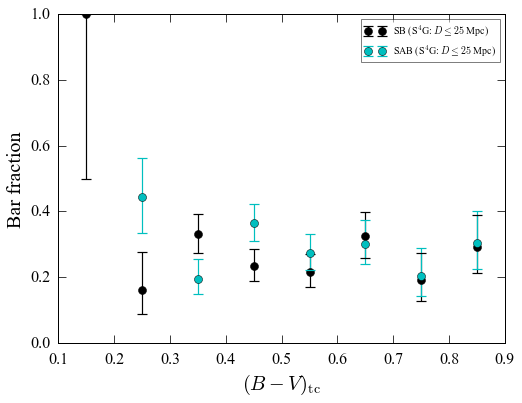

In [27]:
ww25 = s4gdata.weight_BmVtc * s4gdata.w25
ww30 = s4gdata.weight_BmVtc * s4gdata.w30

pu.PlotFrequencyWithWeights(s4gdata.BmV_tc, ww25, ii_SB_limited1_m8_5, ii_nonSB_limited1_m8_5, -0.2,1,0.1, fmt='ko', ms=8, label="SB ("+ss1+")")
pu.PlotFrequencyWithWeights(s4gdata.BmV_tc, ww30, ii_SAB_limited1_m8_5, ii_nonSAB_limited1_m8_5, -0.2,1,0.1, fmt='co', ms=8, noErase=True, label="SAB ("+ss1+")")
plt.ylim(0,1)
plt.xlabel(xtBmV_tc)
plt.ylabel('Bar fraction')
legend(loc="upper right", fontsize=10, framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fSB-fSAB-vs-BmV_corrected.pdf")

### Figure B1

#### Upper left panel

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook.py:2644: UserWarning: Saw kwargs [u'mew', u'markeredgewidth'] which are all aliases for u'markeredgewidth'.  Kept value from u'markeredgewidth'
  seen=seen, canon=canonical, used=seen[-1]))


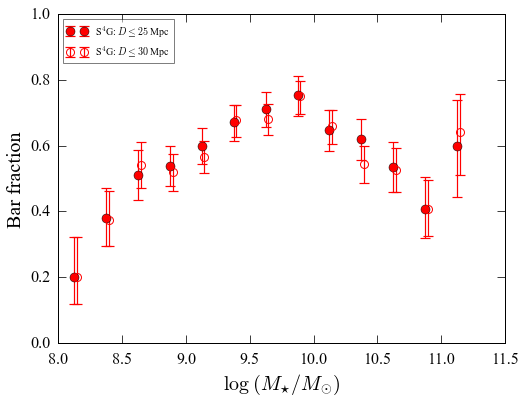

In [28]:
pu.PlotFrequency(s4gdata.logmstar, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.3, 0.25, fmt='ro', ms=9, label=ss1)
pu.PlotFrequency(s4gdata.logmstar, ii_barred_limited2, ii_unbarred_limited2, 8.0, 11.3, 0.25, offset=0.02, fmt='ro', mfc='None', mew=1, mec='r', ms=8,noErase=True, label=ss2)
plt.ylim(0,1)
plt.xlabel(xtmstar)
plt.ylabel('Bar fraction')
legend(loc="upper left", fontsize=10, framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fbar-vs-logmstar_2sample.pdf")

#### Upper right panel

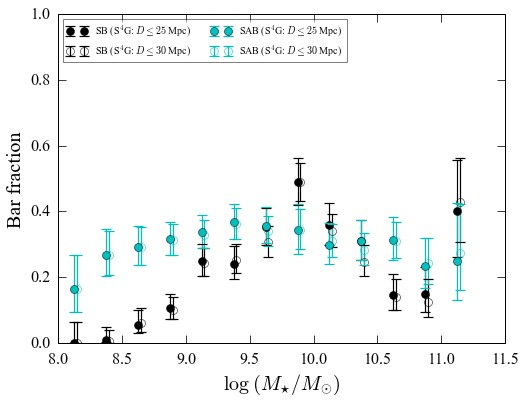

In [29]:
pu.PlotFrequencyWithWeights(s4gdata.logmstar, s4gdata.w25, ii_SB_limited1, ii_nonSB_limited1, 8.0, 11.3, 0.25, fmt='ko', ms=8, label=r'SB (S$^{4}$G: $D \leq 25$ Mpc)')
pu.PlotFrequencyWithWeights(s4gdata.logmstar, s4gdata.w30, ii_SB_limited2, ii_nonSB_limited2, 8.0, 11.3, 0.25, noErase=True, ms=8, fmt='ko', mfc='None', offset=0.02, label=r'SB (S$^{4}$G: $D \leq 30$ Mpc)')
pu.PlotFrequencyWithWeights(s4gdata.logmstar, s4gdata.w25, ii_SAB_limited1, ii_nonSAB_limited1, 8.0, 11.3, 0.25, noErase=True, ms=8, fmt='co', label=r'SAB (S$^{4}$G: $D \leq 25$ Mpc)')
pu.PlotFrequencyWithWeights(s4gdata.logmstar, s4gdata.w30, ii_SAB_limited2, ii_nonSAB_limited2, 8.0, 11.3, 0.25, noErase=True, ms=8, fmt='co', mfc='None', mec='c', offset=0.02, label=r'SAB (S$^{4}$G: $D \leq 30$ Mpc)')

#pu.PlotFrequency(s4gdata.logmstar, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.3, 0.25, fmt='ro', ms=9, label=ss2)
#pu.PlotFrequency(s4gdata.logmstar, ii_barred_limited2, ii_unbarred_limited2, 8.0, 11.3, 0.25, offset=0.02, fmt='ro', mfc='None', mew=1, mec='r', ms=8,noErase=True, label=ss1)
plt.ylim(0,1)
plt.xlabel(xtmstar)
plt.ylabel('Bar fraction')
legend(loc="upper left", ncol=2, fontsize=10, framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fSB-fSAB-vs-logmstar_2sample.pdf")

#### Left middle panel

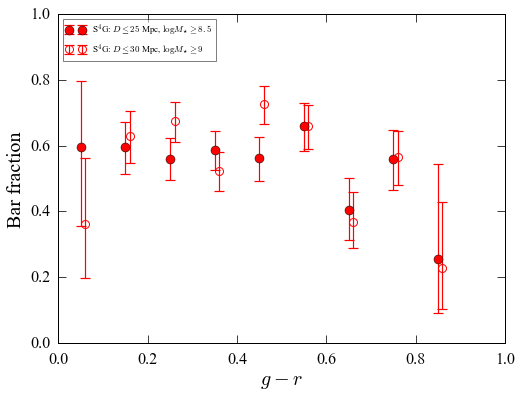

In [30]:
pu.PlotFrequencyWithWeights(s4gdata.gmr_tc, ww25, ii_barred_limited1_m8_5, ii_unbarred_limited1_m8_5, -0.2,1.0,0.1, fmt='ro', ms=9, label=ss1m)
pu.PlotFrequencyWithWeights(s4gdata.gmr_tc, ww30, ii_barred_limited2_m9, ii_unbarred_limited2_m9, -0.2,1.0,0.1, offset=0.01, fmt='ro', mfc='None', mew=1, mec='r', ms=8, noErase=True, label=ss2m)
plt.xlabel(xtgmr)
plt.ylabel('Bar fraction')
xlim(0,1);ylim(0,1)
legend(loc="upper left", fontsize=9, framealpha=0.5)
plt.subplots_adjust(bottom=0.14)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fbar-vs-gmr_corrected_2sample.pdf")

#### Right middle panel

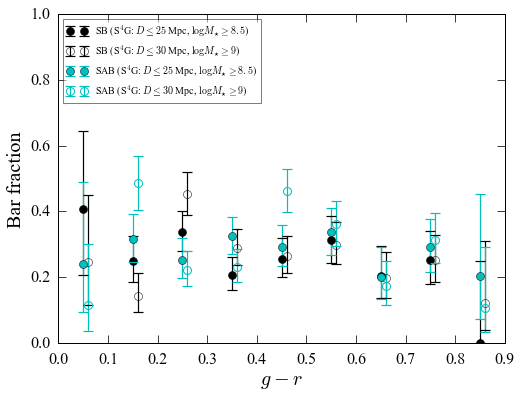

In [31]:
pu.PlotFrequencyWithWeights(s4gdata.gmr_tc, ww25, ii_SB_limited1_m8_5, ii_nonSB_limited1_m8_5, 0,1,0.1, fmt='ko', ms=8, label="SB ("+ss1m+")")
pu.PlotFrequencyWithWeights(s4gdata.gmr_tc, ww30, ii_SB_limited2_m9, ii_nonSB_limited2_m9, 0,1,0.1, noErase=True, ms=8, fmt='ko', mfc='None', offset=0.01, label="SB ("+ss2m+")")
pu.PlotFrequencyWithWeights(s4gdata.gmr_tc, ww25, ii_SAB_limited1_m8_5, ii_nonSAB_limited1_m8_5, 0,1,0.1, noErase=True, fmt='co', ms=8, label="SAB ("+ss1m+")")
pu.PlotFrequencyWithWeights(s4gdata.gmr_tc, ww30, ii_SAB_limited2_m9, ii_nonSAB_limited2_m9, 0,1,0.1, noErase=True, ms=8, fmt='co', mfc='None', mew=1, mec='c', offset=0.01, label="SAB ("+ss2m+")")
plt.ylim(0,1)
plt.xlabel(xtgmr)
plt.ylabel('Bar fraction')
legend(loc="upper left", fontsize=10, framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fSB-fSAB-vs-gmr_corrected_2sample.pdf")

#### Lower left panel

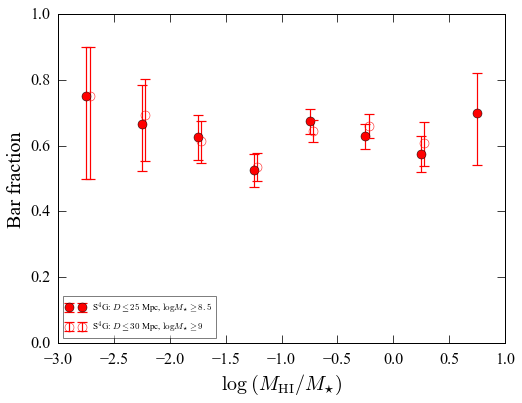

In [32]:
pu.PlotFrequency(s4gdata.logfgas, ii_barred_limited1_m8_5, ii_unbarred_limited1_m8_5, -3,2,0.5, noErase=False, fmt='ro', ms=9, label=ss1m)
pu.PlotFrequency(s4gdata.logfgas, ii_barred_limited2_m9, ii_unbarred_limited2_m9, -3,2,0.5, offset=0.03, noErase=True, fmt='ro', mfc='None', mec='r', ms=9, label=ss2m)
plt.xlabel(xtfgas);plt.ylabel('Bar fraction')
plt.ylim(0,1);plt.xlim(-3,1)
legend(fontsize=9, loc='lower left', framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fbar-vs-fgas_2sample.pdf")

#### Lower right panel

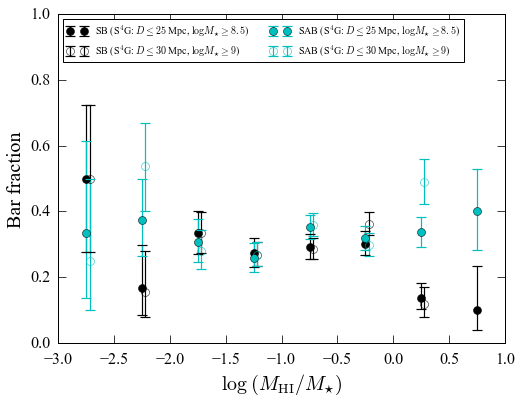

In [33]:
pu.PlotFrequency(s4gdata.logfgas, ii_SB_limited1_m8_5, ii_nonSB_limited1_m8_5, -3,2,0.5, fmt='ko', ms=8, label="SB ("+ss1m+")")
pu.PlotFrequency(s4gdata.logfgas, ii_SB_limited2_m9, ii_nonSB_limited2_m9, -3,2,0.5, noErase=True, ms=8, fmt='ko', mfc='None', mec='k', offset=0.03, label="SB ("+ss2m+")")
pu.PlotFrequency(s4gdata.logfgas, ii_SAB_limited1_m8_5, ii_nonSAB_limited1_m8_5, -3,2,0.5, noErase=True, fmt='co', ms=8, label="SAB ("+ss1m+")")
pu.PlotFrequency(s4gdata.logfgas, ii_SAB_limited2_m9, ii_nonSAB_limited2_m9, -3,2,0.5, noErase=True, ms=8, fmt='co', mfc='None', mec='c', offset=0.03, label="SAB ("+ss2m+")")
plt.legend(loc='upper left', ncol=2, fontsize=10)
plt.ylim(0,1);xlim(-3,1)
plt.xlabel(xtfgas)
plt.ylabel('Bar fraction')
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fSB-fSAB-vs-fgas_2sample.pdf")

### Figure B2

In [38]:
ii_all_limited1_S0 = [i for i in range(nDisksTotal) if s4gdata.dist[i] <= 25 and s4gdata.t_s4g[i] <= -0.5]
ii_barred_limited1_with_S0 = [i for i in range(nDisksTotal) if i in ii_barred and s4gdata.dist[i] <= 25]
ii_unbarred_limited1_with_S0 = [i for i in range(nDisksTotal) if i in ii_unbarred and s4gdata.dist[i] <= 25]
ii_barred_limited1_S0 = [i for i in ii_all_limited1_S0 if i in ii_barred]
ii_unbarred_limited1_S0 = [i for i in ii_all_limited1_S0 if i in ii_unbarred]

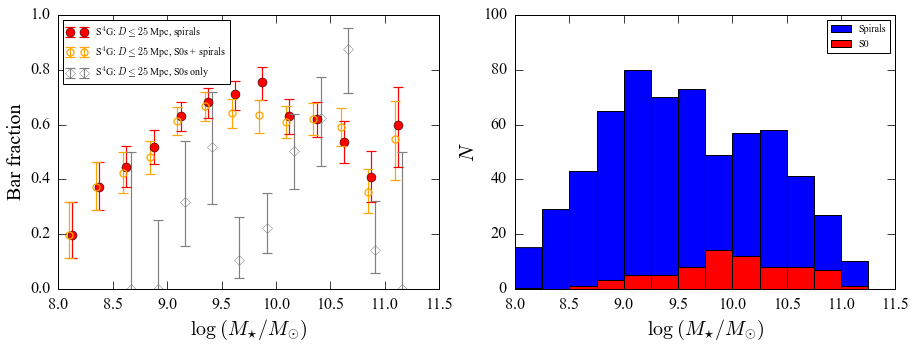

In [39]:
fig,axs = plt.subplots(1,2, figsize=(15,5))

axs[0].plot([8.0,11.5], [0,1], color='None')
pu.PlotFrequencyWithWeights(s4gdata.logmstar, s4gdata.w25, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.3, 0.25, noErase=True, axisObj=axs[0], fmt='ro', ms=9, label=ss1 + ", spirals")
txt2 = ss1 + ", S0s + spirals"
pu.PlotFrequencyWithWeights(s4gdata.logmstar, s4gdata.w25, ii_barred_limited1_with_S0, ii_unbarred_limited1_with_S0, 8.0, 11.3, 0.25, axisObj=axs[0], offset=-0.03, fmt='o', color='orange', mew=1.3, mfc='None', mec='orange', ms=7,noErase=True, label=txt2)
txt3 = ss1 + ", S0s only"
pu.PlotFrequencyWithWeights(s4gdata.logmstar, s4gdata.w25, ii_barred_limited1_S0, ii_unbarred_limited1_S0, 8.0, 11.3, 0.25, axisObj=axs[0], offset=0.04, fmt='D', mfc='None', mec='0.5', ecolor='0.5', ms=7, noErase=True, label=txt3)
axs[0].set_ylim(0,1)
axs[0].set_xlabel(xtmstar)
axs[0].set_ylabel('Bar fraction')
axs[0].legend(loc='upper left', fontsize=10)
plt.subplots_adjust(bottom=0.14)

bins = np.arange(8,11.5, 0.25)
axs[1].hist(s4gdata.logmstar[ii_all_limited1], bins=bins, label='Spirals')
axs[1].hist(s4gdata.logmstar[ii_all_limited1_S0], bins=bins, color='r', label='S0')
axs[1].set_ylim(0,100)
axs[1].set_xlabel(xtmstar);axs[1].set_ylabel(r"$N$")
axs[1].legend(loc='upper right', fontsize=10)
plt.subplots_adjust(bottom=0.14)
if savePlots: savefig(plotDir+"fbar-spirals+S0-vs-mstar-with-mstar-hist.pdf")